In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

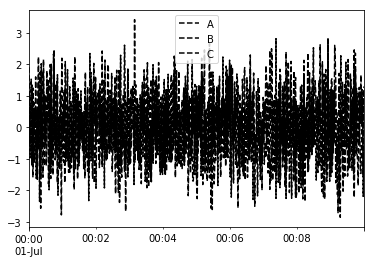

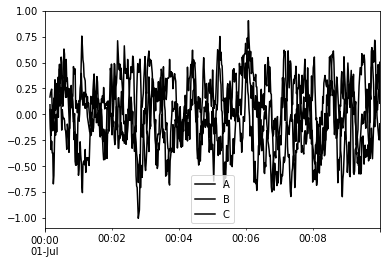

In [4]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [5]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Anac\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  


,A,B,C
2016-07-01 00:00:01,0.934973,-0.210589,1.060782
2016-07-01 00:00:02,0.213793,-0.000171,0.456143
2016-07-01 00:00:03,0.273501,0.109469,0.206856
2016-07-01 00:00:04,0.331457,0.473621,0.315813
2016-07-01 00:00:05,0.562429,0.153612,-0.026647
2016-07-01 00:00:06,0.329900,-0.101468,0.232363
2016-07-01 00:00:07,-0.035096,0.155959,0.086163
2016-07-01 00:00:08,-0.184201,0.105466,-0.131708
2016-07-01 00:00:09,-0.100529,0.220386,-0.007302


In [6]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [7]:
df.head()

,A,B,C,D
2016-06-06,0.662157,-0.568610,-0.583514,0.981164
2016-06-07,0.429693,0.562153,0.604962,0.754109
2016-06-08,-1.361293,0.155067,0.808428,3.431396
2016-06-09,0.510787,-1.643666,-0.178427,0.092984
2016-06-10,-0.397422,-0.339965,-1.896885,0.167559


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000294766ECEF0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000294767EB7B8>], dtype=object)

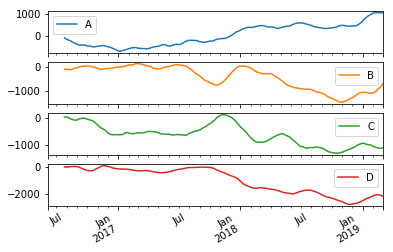

In [8]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [9]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.719706,0.654678,1.239513,1.457051


In [10]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,0.877004,-0.287533,-0.281033,1.358218
2016-06-08,0.494855,-0.142152,0.089270,2.627702
2016-06-09,0.431477,-0.480378,0.229815,3.285690
2016-06-10,0.313966,-0.751307,-0.065235,3.713994


In [11]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

Expanding window will provide a more stable statistic since it uses all the data and gives equal weightage to all data. As time progresses, variation in the data being added will have lesser overall impact. The rolling statistic looks at only the specified number of recent statistic. 

Expaning window will be more appropriate when all data is considered important irrespective of the time of the data.

In [12]:
# EWMA
# Why use EWMA?

EWMA or Exponentially-weighted moving average gives exponentially decreasing weights over time. Exponential smoothing is used for analysis of financial time-series data.

In [13]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [36]:
r=df.rolling(window = 30)

In [37]:
r['C'].aggregate([np.sum,np.mean,np.std])

,sum,mean,std
2016-06-06,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN
2016-06-15,NaN,NaN,NaN


In [ ]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting

In [31]:
import matplotlib.pyplot as plt

C:\Anac\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=30,min_periods=0,adjust=True,ignore_na=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


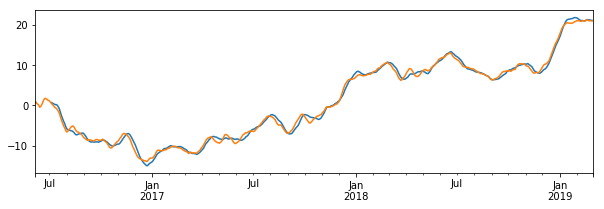

In [38]:
plt.subplots(figsize=(10,3))
r['A'].agg(np.mean).plot()
pd.ewma(df['A'],span=30).plot()